# Regresión Polinomial

#### Elaborado por: Carlos Santillán

Con este ejemplo se pretende contestar a la pregunta **¿Se pueden usar modelos lineales para modelar datos no-lineales?**

Primero, generemos datos aleatorios

In [2]:
## Paquetería a usar
import operator
import numpy as np                  ### numpy sirve para manejar matrices
import matplotlib.pyplot as plt     ### matplotlib sirve para graficar
%matplotlib inline

np.random.seed(0)                   ### fijamos la semilla para aleatoriedad

x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

Los datos generados se ven de la siguiente manera

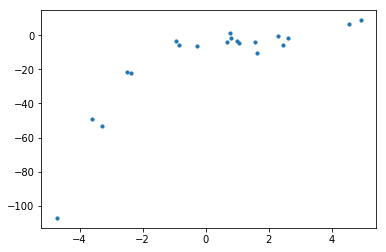

In [3]:
plt.scatter(x, y, s = 10)       ### comando paga generar gráfico de dispersión
plt.show()                      ### muestra la gráfica

Apliquemos **regresión lineal** a nuestros datos:

In [9]:
from sklearn.linear_model import LinearRegression       ### Esta librería sirve para modelos estadísticos

np.random.seed(0)       ### Nuevamente fijamos semilla para aleatoriedad 

x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

## Transformamos los datos para incluir otro eje
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()      ### Se convoca método de Regresión Lineal
model.fit(x, y)                 ### Se ajusta el modelo
y_pred = model.predict(x)       ### Se obtienen los valores pronosticados

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print('El error cuadrático medio es: ' + str(rmse))
print('El valor de R2 es: ' + str(r2))


El error cuadrático medio es: 15.908242501429998
El valor de R2 es: 0.6386750054827146


La gráfica con la recta que mejor adecua al modelo es la siguiente:

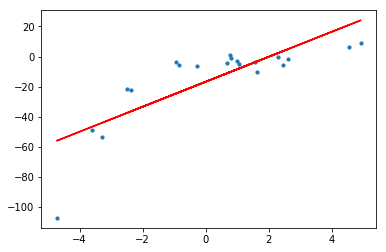

In [5]:
plt.scatter(x, y, s=10)         ### Obtenemos gráfico de dispersión
plt.plot(x, y_pred, color='r')  ### Obtenemos la gráica de la recta que ajusta al modelo
plt.show()                      ### Muestra gráficos

Podemos ver que la recta obtenida por el modelo de regresión lineal simple no logra capturar adecuadamente los patrones de nuestros datos.

- Este es un ejemplo de **sub-ajuste de curva**

**Para solucionar el sub-ajuste, debemos incrementar la complejidad del modelo**

Pasamos de un modelo lineal de tipo:
$Y = \theta_{0} + \theta_{1}x$

A un modelo cuadrático de tipo:
$Y = \theta_{0} + \theta_{1}x + \theta_{2} x^{2}$

Nótese que este sigue siendo un **modelo lineal**, puesto que los coeficientes asociados a los datos siguen siendo lineales.

- $x^{2}$ representa datos, pero $\theta_{2}$ es lineal, sin embargo, la curva que ajustaremos es de naturaleza cuadrática.

- Para pasar nuestros datos en términos de un mayor orden, usaremos la clase *PolynomialFeatures* que se encuentra en la librería de *scikit-learn*

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transformamos los datos para incluir un nuevo vector
x = x[:, np.newaxis]
y = y[:, np.newaxis]

datos_polinomiales= PolynomialFeatures(degree=2)
x_polinomial = datos_polinomiales.fit_transform(x)

modelo = LinearRegression()
modelo.fit(x_polinomial, y)
y_polinomial_pred = modelo.predict(x_polinomial)

rmse = np.sqrt(mean_squared_error(y,y_polinomial_pred))
r2 = r2_score(y,y_polinomial_pred)
print('El error cuadrático medio es: ' + str(rmse))
print('El valor de R2 es: ' + str(r2))

El error cuadrático medio es: 10.120437473614711
El valor de R2 es: 0.8537647164420812


Podemos visualizar el gráfico de la siguiente forma:

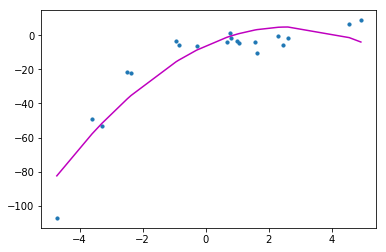

In [11]:
import operator

plt.scatter(x, y, s=10)

# ordenamos los valores de x
ordena_eje = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_polinomial_pred), key=ordena_eje)

x, y_polinomial_pred = zip(*sorted_zip)
plt.plot(x, y_polinomial_pred, color='m')
plt.show()

Es notoria la mejora en el ajuste de los datos, además podemos observar que disminuyó el RMSE y aumentó la $R^{2}$

### Variaciones en el grado del polinomio

Es posible que el ajuste adecuado se obtenga con un grado mayor a 2, en este caso veamos qué sucede si nuestro polinomio es de grado 3

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transformamos los datos para incluir un nuevo vector
x = x[:, np.newaxis]
y = y[:, np.newaxis]

datos_polinomiales= PolynomialFeatures(degree=3)
x_polinomial = datos_polinomiales.fit_transform(x)

modelo = LinearRegression()
modelo.fit(x_polinomial, y)
y_polinomial_pred = modelo.predict(x_polinomial)

rmse = np.sqrt(mean_squared_error(y,y_polinomial_pred))
r2 = r2_score(y,y_polinomial_pred)
print('El error cuadrático medio es: ' + str(rmse))
print('El valor de R2 es: ' + str(r2))

El error cuadrático medio es: 3.449895507408725
El valor de R2 es: 0.9830071790386679


Y observemos también la siguiente gráfica:

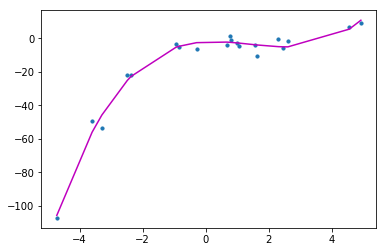

In [13]:
import operator

plt.scatter(x, y, s=10)

# ordenamos los valores de x
ordena_eje = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_polinomial_pred), key=ordena_eje)

x, y_polinomial_pred = zip(*sorted_zip)
plt.plot(x, y_polinomial_pred, color='m')
plt.show()

Este nuevo ajuste pasa por más puntos que el de grado 2, observamos que de nuevo el RMSE disminuyó y $R^{2}$ aumentó con respecto al caso anterior.

Parece ser que mientras mayor sea el grado de los polinomios, mejor es el ajuste en cuanto a los datos.

Tomemos un caso extremo: ajustemos mediante polinomios de grado 20

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transformamos los datos para incluir un nuevo vector
x = x[:, np.newaxis]
y = y[:, np.newaxis]

datos_polinomiales= PolynomialFeatures(degree=20)
x_polinomial = datos_polinomiales.fit_transform(x)

modelo = LinearRegression()
modelo.fit(x_polinomial, y)
y_polinomial_pred = modelo.predict(x_polinomial)

rmse = np.sqrt(mean_squared_error(y,y_polinomial_pred))
r2 = r2_score(y,y_polinomial_pred)
print('El error cuadrático medio es: ' + str(rmse))
print('El valor de R2 es: ' + str(r2))

El error cuadrático medio es: 1.1131423504333375
El valor de R2 es: 0.9982308892895131


Y nuestra gráfica es la siguiente:

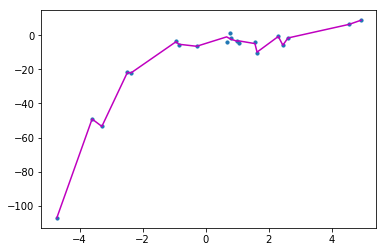

In [16]:
import operator

plt.scatter(x, y, s=10)

# ordenamos los valores de x
ordena_eje = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_polinomial_pred), key=ordena_eje)

x, y_polinomial_pred = zip(*sorted_zip)
plt.plot(x, y_polinomial_pred, color='m')
plt.show()

Ajustando con polinomios de grado 20, aseguramos que prácticamente se pase por todos los puntos de los datos.

- Obsérvese que, de nuevo, el RMSE ha disminuido mientras que $R^{2}$ ha aumentado.

Sin embargo, este ajuste en realidad también está ajustando el polinomio a los datos que son meramente ruido, a esto se le llama **sobre-ajuste**.

- Dado que nuestro ajuste pasa por la mayoría de los datos (incluyendo los que son ruido), fallará cuando queramos hacer generalizaciones sobre los datos no observados (pues puede ubicarlos en posiciones que los convertirían en ruido)

## Sobre-ajuste vs. Sub-ajuste 

- Cuando el ajuste polinomial es de un grado insuficiente (i.e. chico con respecto al comportamiento de nuestros datos) es posible que nos encontremos en un caso de **sub-ajuste**.

	- Para solucionarlo, es necesario aumentar la complejidad del modelo. Esto se logra ya sea pasando de un ajuste lineal a uno polinomial (la opción inmediata siguiente sería de orden cuadrático) o de un polinomio de grado menor a uno de grado mayor.

- Cuando el ajuste polinomial es de un grado muy alto (i.e. muy grande con respecto al comportamiento de nuestros datos) es posible que nos encontremos en un caso de **sobre-ajuste**.

	- Para solucionarlo, es necesario añadir más muestras (datos) al modelo para prevenir que nuestro modelo "aprenda" sobre el ruido en el sistema y nos de resultados más generalizados.

	- De cualquier forma, siempre existe el riesgo de que al añadir más datos, también se esté añadiendo más ruido.

¿Cómo seleccionamos el modelo óptimo para nuestros datos?

## Trade-off de Varianza-Sesgo

- **Sesgo**: se refiere al error dado por una aproximación "simplista" del modelo para ajustar los datos.

	- Un alto nivel de sesgo implica que nuestro modelo no es capaz de *entender* los patrones en los datos; esto puede resultar en **sub-ajuste**

- **Varianza**: se refiere al error dado por una aproximación muy complejo del modelo para ajustar los datos.

	- Una varianza alta implicaría que nuestro modelo pasa, o mejor dicho, se "ajusta" a la mayoría de nuestros datos (incluyendo al ruido) y por ende, tenemos un caso de **sobre-ajuste**

Para temas de Machine Learning, el objetivo es tener un modelo con ambas, bajo sesgo y baja varianza; sin embargo, en la práctica es muy difícil obtener este resultado, de modo que se necesita tener en mente el *trade-off* existente entre ambos factores y buscar un punto óptimo.